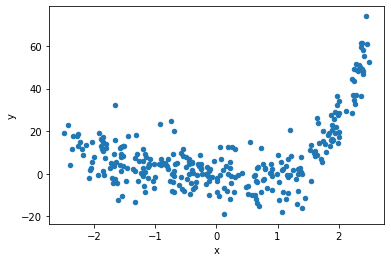

In [1]:
import numpy as np
import pandas as pd
size = 300
X = np.random.rand(size)*5-2.5
w4, w3, w2, w1, w0 = 1, 2, 1, -4, 2
y = w4*(X**4) + w3*(X**3) + w2*(X**2) + w1*X + w0 + np.random.randn(size)*8-4
df = pd.DataFrame({'x': X, 'y': y})
df.to_csv('data_for_reg.csv',index=None)
df.plot.scatter(x='x',y='y')

In [2]:
from sklearn.model_selection import train_test_split
x_plot = np.linspace(min(X),max(X),10000).reshape(-1, 1)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

In [4]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_lin = lin_reg.predict(x_plot)

In [5]:
from sklearn.neighbors import KNeighborsRegressor
knn_3_reg = KNeighborsRegressor(n_neighbors=3)
knn_5_reg = KNeighborsRegressor(n_neighbors=5)
knn_3_reg.fit(X_train,y_train)
knn_5_reg.fit(X_train,y_train)
y_knn3 = knn_3_reg.predict(x_plot)
y_knn5 = knn_5_reg.predict(x_plot)

In [6]:
from sklearn.preprocessing import PolynomialFeatures
poly_feature_2 = PolynomialFeatures(degree=2, include_bias=False)
poly_feature_3 = PolynomialFeatures(degree=3, include_bias=False)
poly_feature_4 = PolynomialFeatures(degree=4, include_bias=False)
poly_feature_5 = PolynomialFeatures(degree=5, include_bias=False)
X_poly_2 = poly_feature_2.fit_transform(X_train)
X_poly_3 = poly_feature_3.fit_transform(X_train)
X_poly_4 = poly_feature_4.fit_transform(X_train)
X_poly_5 = poly_feature_5.fit_transform(X_train)
poly_2_reg = LinearRegression().fit(X_poly_2, y_train)
poly_3_reg = LinearRegression().fit(X_poly_3, y_train)
poly_4_reg = LinearRegression().fit(X_poly_4, y_train)
poly_5_reg = LinearRegression().fit(X_poly_5, y_train)

x_poly_2 = poly_feature_2.fit_transform(x_plot)
x_poly_3 = poly_feature_3.fit_transform(x_plot)
x_poly_4 = poly_feature_4.fit_transform(x_plot)
x_poly_5 = poly_feature_5.fit_transform(x_plot)
y_poly_2 = poly_2_reg.predict(x_poly_2)
y_poly_3 = poly_3_reg.predict(x_poly_3)
y_poly_4 = poly_4_reg.predict(x_poly_4)
y_poly_5 = poly_5_reg.predict(x_poly_5)

In [7]:
import pickle
from sklearn.metrics import mean_squared_error
mse = pd.DataFrame({'train_mse': [mean_squared_error(y_train,lin_reg.predict(X_train)),
                                  mean_squared_error(y_train,knn_3_reg.predict(X_train)),
                                  mean_squared_error(y_train,knn_5_reg.predict(X_train)),
                                  mean_squared_error(y_train,poly_2_reg.predict(poly_feature_2.fit_transform(X_train))),
                                  mean_squared_error(y_train,poly_3_reg.predict(poly_feature_3.fit_transform(X_train))),
                                  mean_squared_error(y_train,poly_4_reg.predict(poly_feature_4.fit_transform(X_train))),
                                  mean_squared_error(y_train,poly_5_reg.predict(poly_feature_5.fit_transform(X_train)))],
                    'test_mse' : [mean_squared_error(y_test,lin_reg.predict(X_test)),
                                  mean_squared_error(y_test,knn_3_reg.predict(X_test)),
                                  mean_squared_error(y_test,knn_5_reg.predict(X_test)),
                                  mean_squared_error(y_test,poly_2_reg.predict(poly_feature_2.fit_transform(X_test))),
                                  mean_squared_error(y_test,poly_3_reg.predict(poly_feature_3.fit_transform(X_test))),
                                  mean_squared_error(y_test,poly_4_reg.predict(poly_feature_4.fit_transform(X_test))),
                                  mean_squared_error(y_test,poly_5_reg.predict(poly_feature_5.fit_transform(X_test)))]},
                  index=['lin_reg','knn_3_reg','knn_5_reg','poly_2_reg','poly_3_reg','poly_4_reg','poly_5_reg'])

with open('mse.pkl','wb') as f:
    pickle.dump(mse,f)
mse

,train_mse,test_mse
lin_reg,195.165052,283.555740
knn_3_reg,42.035196,64.427334
knn_5_reg,49.375500,64.456042
poly_2_reg,90.342494,107.477686
poly_3_reg,62.768405,62.872798
poly_4_reg,55.352908,48.980905
poly_5_reg,55.332443,49.162699


In [8]:
with open('reg.pkl','wb') as f:
    pickle.dump([(lin_reg, None), 
                 (knn_3_reg, None), 
                 (knn_5_reg, None), 
                 (poly_2_reg,poly_feature_2), 
                 (poly_3_reg, poly_feature_3), 
                 (poly_4_reg, poly_feature_4),
                 (poly_5_reg, poly_feature_5)],f)

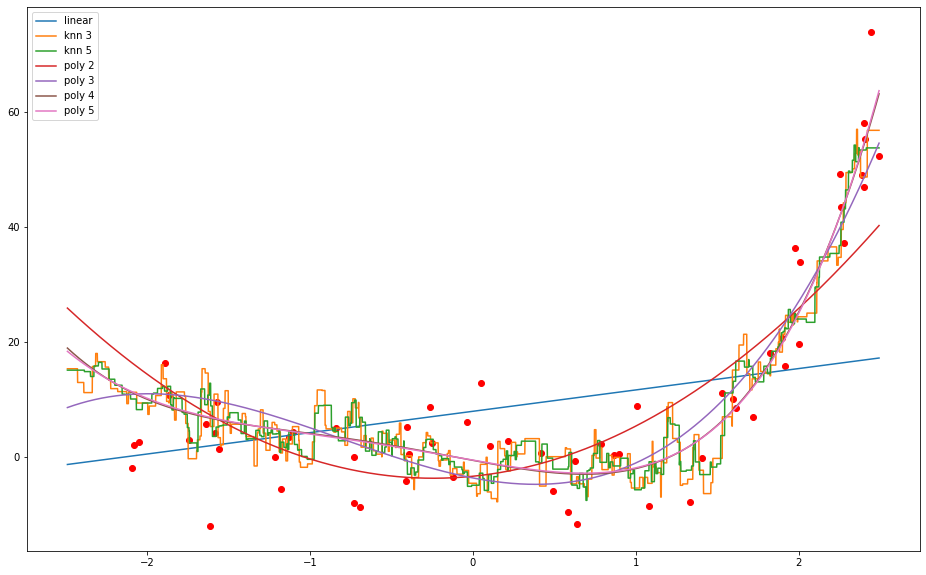

In [9]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16,10))
plt.plot(x_plot,y_lin)
plt.plot(x_plot,y_knn3)
plt.plot(x_plot,y_knn5)
plt.plot(x_plot,y_poly_2)
plt.plot(x_plot,y_poly_3)
plt.plot(x_plot,y_poly_4)
plt.plot(x_plot,y_poly_5)
plt.scatter(X_test,y_test,color='red')
plt.legend(['linear','knn 3','knn 5','poly 2', 'poly 3', 'poly 4','poly 5'])
plt.show()